In [1]:
from math import log
from matplotlib.font_manager import FontProperties
import numpy as np
import matplotlib.pyplot as plt
import operator
import pickle 

## Decision Tree

In [118]:
def createDataSet():
    dataSet =   [[0, 0, 0, 0, 'no'],         #数据集
                [0, 0, 0, 1, 'no'],
                [0, 1, 0, 1, 'yes'],
                [0, 1, 1, 0, 'yes'],
                [0, 0, 0, 0, 'no'],
                [1, 0, 0, 0, 'no'],
                [1, 0, 0, 1, 'no'],
                [1, 1, 1, 1, 'yes'],
                [1, 0, 1, 2, 'yes'],
                [1, 0, 1, 2, 'yes'],
                [2, 0, 1, 2, 'yes'],
                [2, 0, 1, 1, 'yes'],
                [2, 1, 0, 1, 'yes'],
                [2, 1, 0, 2, 'yes'],
                [2, 0, 0, 0, 'no']]
                
    labels = ['年龄', '有工作', '有自己的房子', '信贷情况']        #分类属性
    return dataSet, labels                #返回数据集和分类属性
    
def createDataSet_easy():
    dataSet =   [[1, 1, 'no'],         #数据集
                [0, 0, 'no'],
                [0, 1,'yes'],
                [1, 0, 'yes']]
                
    labels = ['no surfacing', 'flippers']        #分类属性
    return dataSet, labels                #返回数据集和分类属性
    
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)                               #   返回数据集的行数
    labelCounts = {}                                        #   保存每个标签(Label)出现次数的字典
    for featVec in dataSet:                                 #   对每组特征向量进行统计
        currentLabel = featVec[-1]                          #   提取标签(Label)信息
        if currentLabel not in labelCounts.keys():          #   如果标签(Label)没有放入统计次数的字典,添加进去
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1                      #   Label计数
#        print('\nlabelCounts:\n', labelCounts)
    shannonEnt = 0.0                                        #   经验熵(香农熵)
#    print('\nlabelCounts:\n', labelCounts) 
    for key in labelCounts:                                 #   计算香农熵
        prob = float(labelCounts[key]) / numEntries         #   选择该标签(Label)的概率
        shannonEnt -= prob * log(prob,2)                    #   利用公式计算
    return shannonEnt                                       #   返回经验熵(香农熵)    
    
    
def splitDataSet(dataSet, axis, value):       
    retDataSet = []                                         #   创建返回的数据集列表
    for featVec in dataSet:                                 #   遍历数据集
        if featVec[axis] == value:
#            print('\nfeatVec:\n', featVec)
            reducedFeatVec = featVec[:axis]                 #   去掉axis特征
            reducedFeatVec.extend(featVec[axis+1:])         #   将符合条件的添加到返回的数据集
            retDataSet.append(reducedFeatVec)
    return retDataSet                                       #   返回划分后的数据集
            

def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1                       #   dataSet[0]: '[0, 0, 0, 0, 'no'] -  1(除去'no') 的特征数量为 4
    baseEntropy = calcShannonEnt(dataSet)                   #   计算数据集的香农熵
    bestInfoGain = 0.0                                      #   信息增益
    bestFeature = -1                                        #   最优特征的索引值
    
    for i in range(numFeatures):                            #   遍历所有特征
        #获取dataSet的第i个所有特征
        featList = [example[i] for example in dataSet]      #   为每行，按照i列的信息建立一个特征list
        print('\nfeatList:\n', featList)    
        uniqueVals = set(featList)                          #   根据特征listim的元素来创建set集合{},元素不可重复
        print('\nuniqueVals:\n', uniqueVals) 
        
        newEntropy = 0.0                                    #   条件经验熵
        for value in uniqueVals:                            #   计算信息增益
            subDataSet = splitDataSet(dataSet, i, value)    #   subDataSet划分后的子集
            print('\nsubDataSet:\n', subDataSet) 
            prob = len(subDataSet) / float(len(dataSet))    #   计算子集的概率
            newEntropy += prob * calcShannonEnt(subDataSet) #   根据公式计算经验条件熵
        infoGain = baseEntropy - newEntropy                 #   信息增益
        print("第%d个特征的增益为%.3f" % (i, infoGain))     #   打印每个特征的信息增益
        if (infoGain > bestInfoGain):                       #   计算信息增益
            bestInfoGain = infoGain                         #   更新信息增益，找到最大的信息增益
            bestFeature = i                                 #   记录信息增益最大的特征的索引值
    return bestFeature                                      #   返回信息增益最大的特征的索引值

    
def majorityCnt(classList):
    classCount = {}
    for vote in classList:                                        #统计classList中每个元素出现的次数
        if vote not in classCount.keys():
            classCount[vote] = 0   
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)     #   根据字典的值降序排序
    return sortedClassCount[0][0]                                                                   #   返回classList中出现次数最多的元素

    
def createTree(dataSet, labels, featLabels):
    classList = [example[-1] for example in dataSet]            #   取分类标签(是否放贷:yes or no)
    if classList.count(classList[0]) == len(classList):         #   如果类别完全相同则停止继续划分
        return classList[0]
    if len(dataSet[0]) == 1:                                    #   遍历完所有特征时返回出现次数最多的类标签
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)                #   选择最优特征
    bestFeatLabel = labels[bestFeat]                            #   最优特征的标签
    featLabels.append(bestFeatLabel)
    myTree = {bestFeatLabel:{}}                                 #   根据最优特征的标签生成树
    del(labels[bestFeat])                                       #   删除已经使用特征标签
    featValues = [example[bestFeat] for example in dataSet]     #   得到训练集中所有最优特征的属性值
    uniqueVals = set(featValues)                                #   去掉重复的属性值
    for value in uniqueVals:                                    #   遍历特征，创建决策树。                       
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), labels, featLabels)
    return myTree


#   获取决策树叶结点的数目
def getNumLeafs(myTree):
    numLeafs = 0                                                #初始化叶子
    firstStr = next(iter(myTree))                                #python3中myTree.keys()返回的是dict_keys,不再是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    secondDict = myTree[firstStr]                                #获取下一组字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':                #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs
    
    
#   获取决策树 的 层数
def getTreeDepth(myTree):
    maxDepth = 0                                                #初始化决策树深度
    firstStr = next(iter(myTree))                                #python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    secondDict = myTree[firstStr]                                #获取下一个字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':                #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth            #更新层数
    return maxDepth
    
    
#   绘制带箭头注解
def plotNode(nodeTxt, centerPt, parentPt, nodeType):                        
    arrow_args = dict(arrowstyle="<-")                                            #定义箭头格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)        #设置中文字体
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',    #绘制结点
        xytext=centerPt, textcoords='axes fraction',
        va="center", ha="center", bbox=nodeType, arrowprops=arrow_args, FontProperties=font)
        
#   在父子节点之间填充文本信息
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]                                            #计算标注位置                   
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)
    
        
  # 绘制决策树
def plotTree(myTree, parentPt, nodeTxt):                    
    decisionNode = dict(boxstyle="sawtooth", fc="0.8")                                      #设置结点格式，  定义文本框和箭头模式
    leafNode = dict(boxstyle="round4", fc="0.8")                                            #设置叶结点格式
    numLeafs = getNumLeafs(myTree)                                                          #获取决策树叶结点数目，决定了树的宽度
    depth = getTreeDepth(myTree)                                                            #获取决策树层数
    firstStr = next(iter(myTree))                                                            #下个字典                                                 
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)    #中心位置
    plotMidText(cntrPt, parentPt, nodeTxt)                                                    #标注有向边属性值
    plotNode(firstStr, cntrPt, parentPt, decisionNode)                                        #绘制结点
    secondDict = myTree[firstStr]                                                            #下一个字典，也就是继续绘制子结点
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD                                        #y偏移
    for key in secondDict.keys():                               
        if type(secondDict[key]).__name__=='dict':                                            #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            plotTree(secondDict[key],cntrPt,str(key))                                        #不是叶结点，递归调用继续绘制
        else:                                                                                #如果是叶结点，绘制叶结点，并标注有向边属性值                                             
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD


#  绘制图像
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')                                                    #创建fig
    fig.clf()                                                                                #清空fig
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)                                #去掉x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))                                            #获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))                                            #获取决策树层数
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;                                #x偏移
    plotTree(inTree, (0.5,1.0), '')                                                            #绘制决策树
    plt.show()                                                                                 #显示绘制结果     

    
def classify(inputTree, featLabels, testVec):
    firstStr = next(iter(inputTree))                                                        #获取决策树结点
    secondDict = inputTree[firstStr]                                                        #下一个字典
    featIndex = featLabels.index(firstStr)                                               
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else: classLabel = secondDict[key]
    return classLabel
    

#   将决策树保存在硬盘上
def storeTree(inputTree, filename):
    with open(filename, 'wb') as fw:
        pickle.dump(inputTree, fw)
        
#   将硬盘上的决策树载入  
def grabTree(filename):
    fr = open(filename, 'rb')
    return pickle.load(fr) 

In [119]:
dataSet, labels = createDataSet() 
featLabels = []
myTree = createTree(dataSet, labels, featLabels)


featList:
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

uniqueVals:
 {0, 1, 2}

subDataSet:
 [[0, 0, 0, 'no'], [0, 0, 1, 'no'], [1, 0, 1, 'yes'], [1, 1, 0, 'yes'], [0, 0, 0, 'no']]

subDataSet:
 [[0, 0, 0, 'no'], [0, 0, 1, 'no'], [1, 1, 1, 'yes'], [0, 1, 2, 'yes'], [0, 1, 2, 'yes']]

subDataSet:
 [[0, 1, 2, 'yes'], [0, 1, 1, 'yes'], [1, 0, 1, 'yes'], [1, 0, 2, 'yes'], [0, 0, 0, 'no']]
第0个特征的增益为0.083

featList:
 [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]

uniqueVals:
 {0, 1}

subDataSet:
 [[0, 0, 0, 'no'], [0, 0, 1, 'no'], [0, 0, 0, 'no'], [1, 0, 0, 'no'], [1, 0, 1, 'no'], [1, 1, 2, 'yes'], [1, 1, 2, 'yes'], [2, 1, 2, 'yes'], [2, 1, 1, 'yes'], [2, 0, 0, 'no']]

subDataSet:
 [[0, 0, 1, 'yes'], [0, 1, 0, 'yes'], [1, 1, 1, 'yes'], [2, 0, 1, 'yes'], [2, 0, 2, 'yes']]
第1个特征的增益为0.324

featList:
 [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0]

uniqueVals:
 {0, 1}

subDataSet:
 [[0, 0, 0, 'no'], [0, 0, 1, 'no'], [0, 1, 1, 'yes'], [0, 0, 0, 'no'], [1, 0, 0, 'no'], [1, 0, 1, 'no'], [2, 1, 1,

In [120]:
myTree

{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}

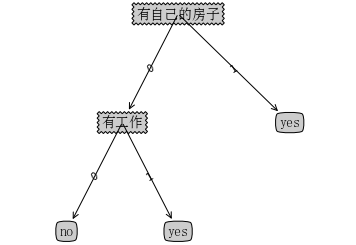

In [121]:
createPlot(myTree)

{0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}

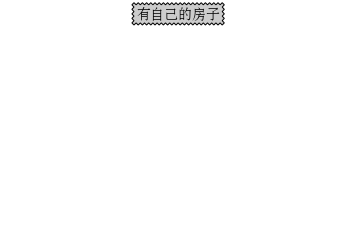

In [164]:
fig = plt.figure(1, facecolor='white')                                                    #创建fig
fig.clf()                                                                                #清空fig
axprops = dict(xticks=[], yticks=[])
createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)                                #去掉x、y轴
plotTree.totalW = float(getNumLeafs(myTree))
plotTree.totalD = float(getTreeDepth(myTree))
plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
numLeafs = getNumLeafs(myTree)
depth = getTreeDepth(myTree)
firstStr= next(iter(myTree))
cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
parentPt = (0.5,1.0); nodeTxt = ''
plotMidText(cntrPt, parentPt, '')
plotNode(firstStr, cntrPt, parentPt, decisionNode) 
secondDict = myTree[firstStr]
secondDict

In [165]:
secondDict.keys()

dict_keys([0, 1])

In [166]:
plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
plotNode(secondDict[0], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(0))

## Tree-based Methods

In [101]:


def loadDataSet_2(fileName):
    dataList = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float, curLine))      # map data to float()
        dataList.append(fltLine)
    return dataList

def showTree(dataList, yArr_pred=None, mode="regTree"):
    n = len(dataList)                                                    
    xcord = []; ycord = []      

    if (np.shape(dataList)[1] == 2):            # check the number of columns
        for i in range(n):   
            xcord.append(dataList[i][0]); ycord.append(dataList[i][1])    
    elif(np.shape(dataList)[1] == 3):
        for i in range(n):   
            xcord.append(dataList[i][1]); ycord.append(dataList[i][2])    

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)                                            
    ax.scatter(xcord, ycord, s = 20, c = 'blue',alpha = .5)      
    if(np.all(yArr_pred != None)):
        xMat_test = np.mat(xcord).T          
        srtInd = xMat_test.argsort(0)    
        xSort  = xMat_test[srtInd][:,0,:]    # copy the xMat_test in ascending order for pyplot
        ax.plot(xSort[:], yArr_pred[srtInd], c = 'red')  
    if(mode == "regTree"):
        plt.title('Regression  Tree')         
    elif(mode == "modTree"):
        plt.title('Model  Tree')  
    plt.xlabel('X')
    plt.show()


##########################   functions for building Regression Tree    ##########################

def regLeaf(dataMat):                      # calculate the MEAN value as the model for a Leaf node
    return np.mean(dataMat[:,-1])          # dataMat[:,-1]: the last column of dataMat is Y

def regErr(dataMat):                       # calculate the TOTAL Squared Error of the target variables in a given dataset
    return np.var(dataMat[:,-1]) * np.shape(dataMat)[0]            # var(x): mean((x_i - x.mean())**2)
    # the smaller the variance is, the better the split. Goal: try to use LEAST split to seperate the whole data set

##########################   functions for building Model Tree    ##############################

def linearSolve(dataMat):  # format the dataset into the target variable Y and the independent variable X
    m,n = np.shape(dataMat)
    X = np.mat(np.ones((m,n))); Y = np.mat(np.ones((m,1)))      # generate ones-matrix
    X[:,1:n] = dataMat[:,0:n-1];       # copy feature matrix to X, the 0th-column of matrix X is constant 1 as offset
    Y = dataMat[:,-1]                  # copy target matrix to Y
    xTx = X.T*X
    if np.linalg.det(xTx) == 0.0:                   # check the inversability
        raise NameError('This matrix is singular, cannot do inverse,\n\
        try increasing the second value of Stop Condition')
    ws = xTx.I * (X.T * Y)                          # calculate the optimal weight matrix ws with least-squares method
    return ws,X,Y


def modelLeaf(dataMat):                             # generate a model for a leaf node
    ws,X,Y = linearSolve(dataMat)
    return ws

def modelErr(dataMat):                              # calculate the total squared error 
    ws,X,Y = linearSolve(dataMat)                   # of model against target
    yHat = X * ws
    return sum(np.power(Y - yHat, 2))        


##########################   functions for split    ##############################

def binSplitDataSet(dataMat, feature, value):                          # binary split
    mat0 = dataMat[np.nonzero(dataMat[:,feature] <= value)[0],:]       # np.nonzero(dataMat[:,feature] <= value)[0]: return index of target rows
    mat1 = dataMat[np.nonzero(dataMat[:,feature] > value)[0],:]        # np.nonzero(dataMat[:,feature] > value)[0]: return index of target rows
    return mat0, mat1

def chooseBestSplit(dataMat, leafType = regLeaf, errType = regErr, stopCond = (1,4)):
    minErrReduction = stopCond[0];         # stop condition: minimal Error reduction should be made through a new split
    minInstance = stopCond[1]              # stop condition: minimal amount of instances should be included in a leaf node
    if len(set(dataMat[:,-1].T.tolist()[0])) == 1:     # If all y-values are equal, NO SPLIT: Leaf node
        return None, leafType(dataMat)                 # calculate value for leaf node  
    
    m, n = np.shape(dataMat)      # get the size of dataset
    preError = errType(dataMat)   # setting the last feature as the best split and estimate its error for further compare
    bestError = float('inf');     # initialize bestError as an infinite value
    bestIndex = 0;                # initialize best splitting feature(Index) 
    bestValue = 0                 # initialize best splitting value
  
    for featIndex in range(n - 1):   # iterate all feature columns to find the splitting feature and splitting value
        for splitVal in set(dataMat[:,featIndex].T.tolist()[0]):    # iterate all x-values of ONE certain feature
            mat0, mat1 = binSplitDataSet(dataMat, featIndex, splitVal) 
            if (np.shape(mat0)[0] < minInstance) or (np.shape(mat1)[0] < minInstance): continue  # stop conditions met, NO SPLIT: Leaf node
            newError = errType(mat0) + errType(mat1)      # calculate the new error from two split sets
            if newError < bestError:                      # update if new error is smaller than best error
                bestIndex = featIndex
                bestValue = splitVal
                bestError = newError
                
    if (preError - bestError) < minErrReduction:                 # If stop conditions met, NO SPLIT: leaf node
        return None, leafType(dataMat)                           # calculate value for leaf node
    
    mat0, mat1 = binSplitDataSet(dataMat, bestIndex, bestValue)   # otherweise make the best split
    if (np.shape(mat0)[0] < minInstance) or (np.shape(mat1)[0] < minInstance):  # If stop conditions met, NO SPLIT: leaf node
        return None, leafType(dataMat)                            # calculate value for leaf node  
    return bestIndex, bestValue


##########################   functions for Creating and Pruning tree    ##############################

def createTree(dataMat_train, leafType = regLeaf, errType = regErr, stopCond = (1, 4)):
    feat, val = chooseBestSplit(dataMat_train, leafType, errType, stopCond)
    if feat == None: return val        # If stop condition met, return leaf value for the leaf node 
    retTree = {}                       # define retTree as dictionary
    retTree['spFeatIndex'] = feat
    retTree['spValue'] = val
    left_Set, right_Set = binSplitDataSet(dataMat_train, feat, val)
    retTree['left'] = createTree(left_Set, leafType, errType, stopCond)
    retTree['right'] = createTree(right_Set, leafType, errType, stopCond)
    return retTree  

def isTree(obj):      # check whether it is a tree or a leaf node
    return (type(obj).__name__ == 'dict') 
 

def getMean(tree):    # descend a tree untill it hits only leaf nodes, then take the MEAN value of both
    if isTree(tree['right']): 
        tree['right'] = getMean(tree['right'])
    if isTree(tree['left']): 
        tree['left'] = getMean(tree['left'])
    return (tree['left'] + tree['right']) / 2.0    


def prune(tree, testData):            # Post-pruning
    if np.shape(testData)[0] == 0:    # If no test data return MEAN value of left and right nodes 
        return getMean(tree)  
    
    if (isTree(tree['right']) or isTree(tree['left'])):  # split test data according to the trained tree
        lSet, rSet = binSplitDataSet(testData, tree['spFeatIndex'], tree['spValue'])
    if isTree(tree['left']): 
        tree['left'] = prune(tree['left'], lSet)      # prune the left subtree
    if isTree(tree['right']): 
        tree['right'] = prune(tree['right'], rSet)    # prune the right subtree
    if not isTree(tree['left']) and not isTree(tree['right']):     # if the leaf node of trained tree is reached
        
        #  test the total squared error with the value of leaf node of trained tree
        lSet, rSet = binSplitDataSet(testData, tree['spFeatIndex'], tree['spValue']) 
        errorNoMerge = np.sum(np.power(lSet[:,-1] - tree['left'], 2)) + np.sum(np.power(rSet[:,-1] - tree['right'], 2))

        #  test the total squared error with the MEAN value of leaf node of trained tree
        treeMean = (tree['left'] + tree['right']) / 2.0
        errorMerge = np.sum(np.power(testData[:,-1] - treeMean, 2))
        
        if errorMerge < errorNoMerge: 
  #          print("merging, tree['spFeatIndex']: {}, tree['spValue']:{}, tree['left']:{}, tree['right']:{}".format(tree['spFeatIndex'],tree['spValue'],tree['left'],tree['right']))
  #          print("treeMean:", treeMean)
  #          print("\n")
            return treeMean             # MERGE the left and right leaf node into one leaf node with MEAN value
        else: 
            return tree
    else: 
        return tree
    
    
    
##########################   functions for Prediction with Tree Model    ##############################

def regTreeEval(model, inDat):     # evaluate a Regression Tree leaf node
    return float(model)            # return the value at the leaf node


def modelTreeEval(model, inDat):   # evaluate a Model Tree leaf node
    n = np.shape(inDat)[1]
    X = np.mat(np.ones((1, n+1)))  # n+1 features, including the offset
    X[:, 1: n+1] = inDat           # copy inDat to X second to (n+1)th. column, X first column is offset with value '1'
    return float(X * model)        # return the forecasted value


# give one forecast for one data point, for a given tree.
def treeForecast(tree_trained, dataMat_test, modelEval=regTreeEval):

    if not isTree(tree_trained):                                # when a leaf node is hit, run modelEval()
        return modelEval(tree_trained, inData)
    
#    print("dataMat_test[tree_trained['spFeatIndex']]: ", dataMat_test[:,tree_trained['spFeatIndex']])
#    print("tree_trained['spValue']: ", tree_trained['spValue'])
    
    if dataMat_test[:,tree_trained['spFeatIndex']] <= tree_trained['spValue']:    # follow the tree based on the input data 
        if isTree(tree_trained['left']):                                          # until a leaf node is hit 
            return treeForecast(tree_trained['left'], dataMat_test, modelEval)
        else:
            return modelEval(tree_trained['left'], dataMat_test)
    else:
        if isTree(tree_trained['right']):
            return treeForecast(tree_trained['right'], dataMat_test, modelEval)
        else:
            return modelEval(tree_trained['right'], dataMat_test)
        
        
def createForeCast(tree_trained, dataMat_test, modelEval=regTreeEval):
    m = len(dataMat_test)
    yArr_pred = np.zeros(m)
    for i in range(m):                        #  run prediction for each SINGLE value of test set
        yArr_pred[i] = treeForecast(tree_trained, np.mat(dataMat_test[i]), modelEval)
    return yArr_pred


##########################   functions for plot the tree    ##############################

def getNumLeafs(tree, numLeafNode=0):
#    print("tree is {} and numLeafNode is {}".format(tree, numLeafNode))
   
    if isTree(tree['left']):       # check the 'left' part, whether it is a leaf node already
        numLeafNode = countLeafNode(tree['left'], numLeafNode)
    else:
        numLeafNode += 1           # 'left' is a leaf node,then increment the total number of leaf node and then  check the 'right' of the SAME level!

    if isTree(tree['right']):      # check the 'right' of the SAME level
        numLeafNode = countLeafNode(tree['right'], numLeafNode)
    else:
        return numLeafNode + 1     # if it is a lefe node, then return to the last stage
    
    return numLeafNode


def getDepth(tree, numTreeDepth=0, max =0):
    
#   print("\ntree is {} \nnumTreeDepth is {} \nmax is {}".format(tree, numTreeDepth, max))
    if not isTree(tree): 
#        print("not a tree !!")
        return 0
   
    if isTree(tree['left']):       # check the 'left' part, whether it is a tree 
        max = getDepth(tree['left'], numTreeDepth + 1, max)     # it is a tree, then go deep

    if isTree(tree['right']):      # check the 'right' of the SAME level
        max = getDepth(tree['right'], numTreeDepth + 1, max)
    else:
        numTreeDepth += 1
        
    max = numTreeDepth if numTreeDepth >= max else max
    return max             # return to the last stage
    
    
def getTreeDepth(tree):
    leftDepth = getDepth(tree['left'])
    rightDepth = getDepth(tree['right'])
    treeDepth = leftDepth if leftDepth >= rightDepth else rightDepth
    return treeDepth+1

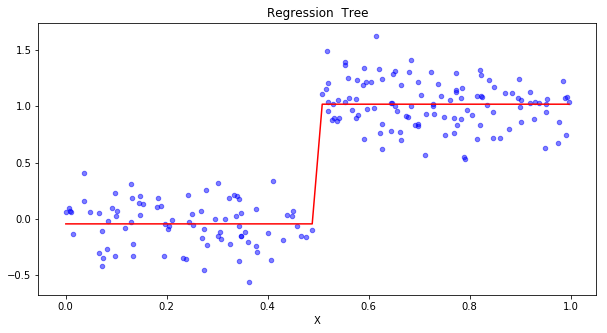

Regression tree:  {'spFeatIndex': 0, 'spValue': 0.48813, 'left': -0.04465028571428572, 'right': 1.0180967672413792}

correlation coefficients (Origin)):  0.9317625287364821


In [102]:
##   Regression tree: Data 1
dataList = loadDataSet_2("./input/data1.txt")
dataMat = np.mat(dataList)
tree_trained = createTree(dataMat)
yArr_pred = createForeCast(tree_trained, dataMat[:,0])
showTree(dataList, yArr_pred)
print("Regression tree: ", tree_trained)
print("\ncorrelation coefficients (Origin)): ", np.corrcoef(yArr_pred, dataMat[:,1], rowvar=0)[0,1])

In [103]:
tree_trained

{'spFeatIndex': 0,
 'spValue': 0.48813,
 'left': -0.04465028571428572,
 'right': 1.0180967672413792}

In [104]:
getDepth(tree_trained['left'])

not a tree !!


0

In [105]:
getDepth(tree_trained['right'])

not a tree !!


0

In [106]:
getTreeDepth(tree_trained)

not a tree !!
not a tree !!


1

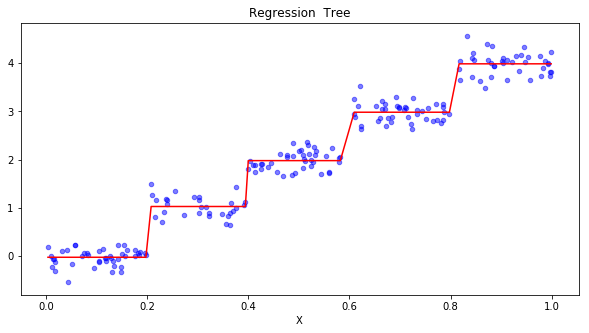

Regression tree:  {'spFeatIndex': 1, 'spValue': 0.39435, 'left': {'spFeatIndex': 1, 'spValue': 0.197834, 'left': -0.023838155555555553, 'right': 1.0289583666666666}, 'right': {'spFeatIndex': 1, 'spValue': 0.582002, 'left': 1.980035071428571, 'right': {'spFeatIndex': 1, 'spValue': 0.797583, 'left': 2.9836209534883724, 'right': 3.9871632}}}

correlation coefficients (Origin):  0.990699979467444


In [107]:
##   Regression tree: Data 2
dataList = loadDataSet_2("./input/data2.txt")
dataMat = np.mat(dataList)
tree_trained = createTree(dataMat)
yArr_pred = createForeCast(tree_trained, dataMat[:,:-1])
showTree(dataList, yArr_pred)
print("Regression tree: ", tree_trained)
print("\ncorrelation coefficients (Origin): ", np.corrcoef(yArr_pred, dataMat[:,2], rowvar=0)[0,1])

In [108]:
print(tree_trained)

{'spFeatIndex': 1, 'spValue': 0.39435, 'left': {'spFeatIndex': 1, 'spValue': 0.197834, 'left': -0.023838155555555553, 'right': 1.0289583666666666}, 'right': {'spFeatIndex': 1, 'spValue': 0.582002, 'left': 1.980035071428571, 'right': {'spFeatIndex': 1, 'spValue': 0.797583, 'left': 2.9836209534883724, 'right': 3.9871632}}}


In [109]:
tree_trained

{'spFeatIndex': 1,
 'spValue': 0.39435,
 'left': {'spFeatIndex': 1,
  'spValue': 0.197834,
  'left': -0.023838155555555553,
  'right': 1.0289583666666666},
 'right': {'spFeatIndex': 1,
  'spValue': 0.582002,
  'left': 1.980035071428571,
  'right': {'spFeatIndex': 1,
   'spValue': 0.797583,
   'left': 2.9836209534883724,
   'right': 3.9871632}}}

In [110]:
getDepth(tree_trained['left'])

1

In [111]:
getDepth(tree_trained['right'])

2

In [112]:
getTreeDepth(tree_trained)

3

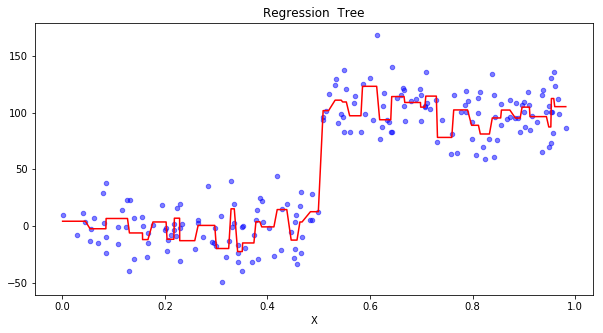

correlation coefficients (Origin):  0.9562960257378958


In [113]:
##   Regression tree: Data 3 (TRAIN, stopcondition(1,4))
dataList = loadDataSet_2("./input/data3.txt")
dataMat = np.mat(dataList)
tree_trained = createTree(dataMat, stopCond=(1,4))
yArr_pred = createForeCast(tree_trained, dataMat[:,0])
showTree(dataList, yArr_pred)
print("correlation coefficients (Origin): ", np.corrcoef(yArr_pred, dataMat[:,1], rowvar=0)[0,1])

In [114]:
getTreeDepth(tree_trained)

12

In [115]:
getDepth(tree_trained['left'])

11

In [116]:
getDepth(tree_trained['right'])

10